In [1]:
import pandas as pd
from scipy.stats import gennorm, norm, lognorm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest

In [2]:
df = pd.read_csv("camels_geol.txt", sep=";")
df.head()

,gauge_id,geol_1st_class,glim_1st_class_frac,geol_2nd_class,glim_2nd_class_frac,carbonate_rocks_frac,geol_porostiy,geol_permeability
0,1013500,Siliciclastic sedimentary rocks,0.815904,Basic volcanic rocks,0.179729,0.000000,0.1714,-14.7019
1,1022500,Acid plutonic rocks,0.590658,Siliciclastic sedimentary rocks,0.164618,0.000000,0.0710,-14.2138
2,1030500,Siliciclastic sedimentary rocks,0.573305,Metamorphics,0.287010,0.052140,0.1178,-14.4918
3,1031500,Siliciclastic sedimentary rocks,0.448928,Metamorphics,0.443863,0.026258,0.0747,-14.8410
4,1047000,Metamorphics,0.308488,Acid plutonic rocks,0.288613,0.000000,0.0522,-14.4819


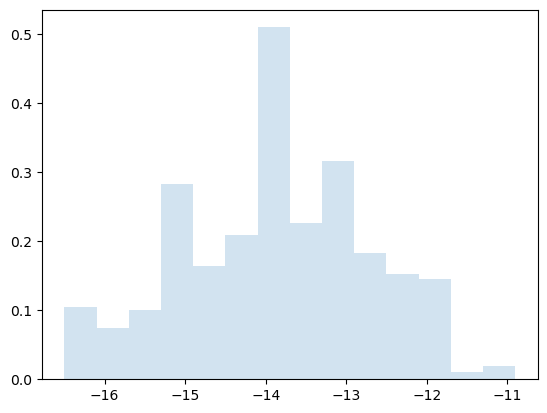

In [3]:
fig, ax = plt.subplots(1, 1)
ax.hist(df["geol_permeability"], density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()

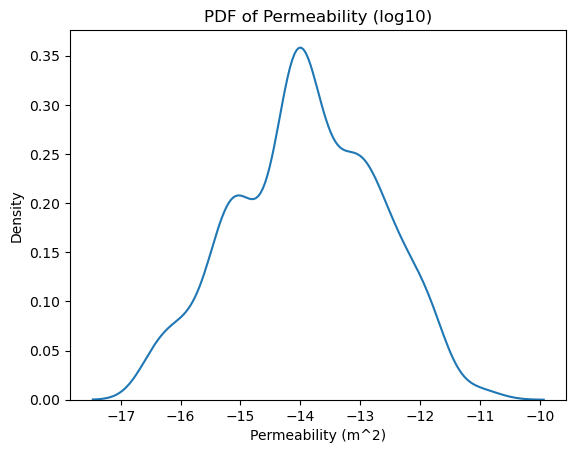

In [4]:
sns.kdeplot(df['geol_permeability'], bw_adjust=1, fill=False)
plt.title('PDF of Permeability (log10)')
plt.xlabel('Permeability (m^2)')
plt.ylabel('Density')

plt.show()

In [5]:
print(df['geol_permeability'].count())

671


2.880239045848093 -13.899028081513123 1.9249888962579114


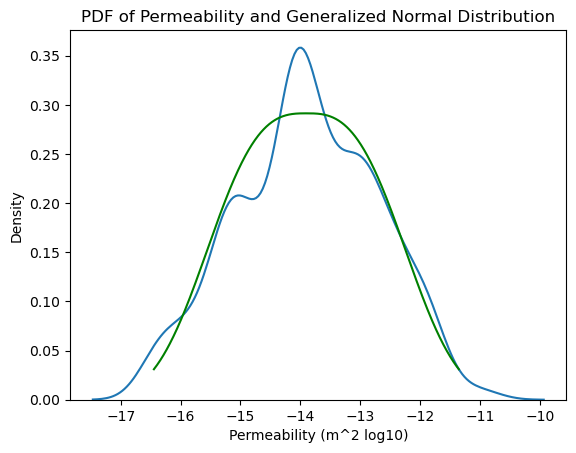

           values
count  671.000000
mean   -13.899028
std      1.473902
min    -16.446200
25%    -15.172614
50%    -13.899028
75%    -12.625442
max    -11.351856


In [6]:
# fit et values to generalized normal dist

# generate parameters for generalized norm dist
shape_gn, loc_gn, scale_gn = gennorm.fit(df["geol_permeability"])
print(shape_gn, loc_gn, scale_gn)

# generate sample gennorm dist given params
x = np.linspace(gennorm.ppf(0.01, shape_gn, loc_gn, scale_gn), gennorm.ppf(0.99, shape_gn, loc_gn, scale_gn), 671)
pdf = gennorm.pdf(x, shape_gn, loc_gn, scale_gn)

sns.kdeplot(df['geol_permeability'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gennorm pdf

plt.title('PDF of Permeability and Generalized Normal Distribution')
plt.xlabel('Permeability (m^2 log10)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

-13.885704619970195 1.1835051170736903


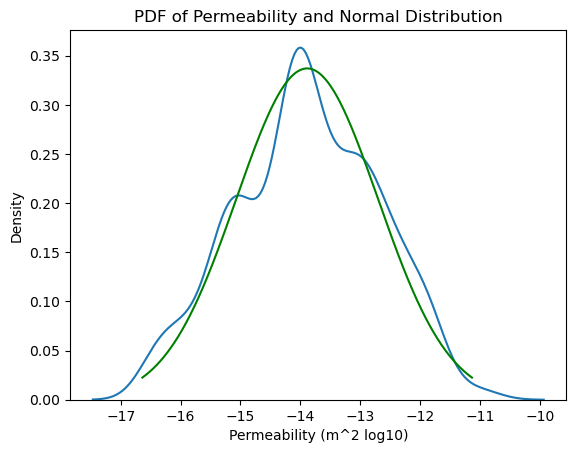

           values
count  671.000000
mean   -13.885705
std      1.593145
min    -16.638949
25%    -15.262327
50%    -13.885705
75%    -12.509082
max    -11.132460


In [7]:
# fit et values to generalized normal dist

# generate parameters for generalized norm dist
loc_n, scale_n = norm.fit(df["geol_permeability"])
print(loc_n, scale_n)

# generate sample gennorm dist given params
x = np.linspace(norm.ppf(0.01, loc_n, scale_n), norm.ppf(0.99, loc_n, scale_n), 671)
pdf = norm.pdf(x, loc_n, scale_n)

sns.kdeplot(df['geol_permeability'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gennorm pdf

plt.title('PDF of Permeability and Normal Distribution')
plt.xlabel('Permeability (m^2 log10)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

0.008755969704597546 -148.74180969312488 134.84859402186743


/srv/conda/envs/notebook/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6547: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


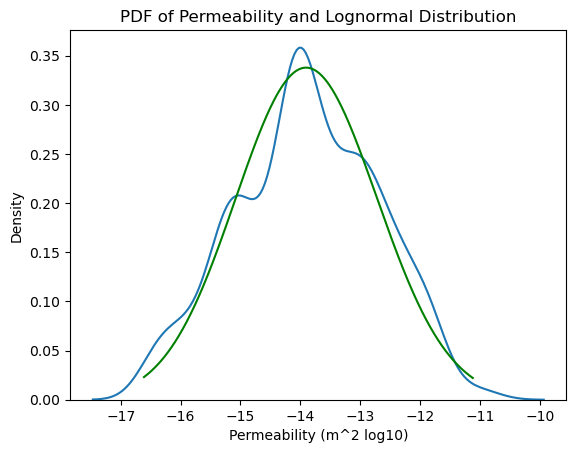

           values
count  671.000000
mean   -13.865239
std      1.589519
min    -16.612219
25%    -15.238729
50%    -13.865239
75%    -12.491750
max    -11.118260


In [8]:
# fit et values to generalized normal dist

# generate parameters for generalized norm dist
shape_ln, loc_ln, scale_ln = lognorm.fit(df["geol_permeability"])
print(shape_ln, loc_ln, scale_ln)

# generate sample gennorm dist given params
x = np.linspace(lognorm.ppf(0.01, shape_ln, loc_ln, scale_ln), lognorm.ppf(0.99, shape_ln, loc_ln, scale_ln), 671)
pdf = lognorm.pdf(x, shape_ln, loc_ln, scale_ln)

sns.kdeplot(df['geol_permeability'], bw_adjust=1, fill=False) # plot actual pdf
plt.plot(x, pdf, c='green') # plot gennorm pdf

plt.title('PDF of Permeability and Lognormal Distribution')
plt.xlabel('Permeability (m^2 log10)')
plt.ylabel('Density')

plt.show()

xdf = pd.DataFrame(x, columns=['values'])
print(xdf.describe())

In [10]:
# perform KS tests

dists = {
    'gennorm': (shape_gn, loc_gn, scale_gn),
    'norm': (loc_n, scale_n),
    'lognorm': (shape_ln, loc_ln, scale_ln)
}

for dist in dists:
    print(dist + ': ' + str(kstest(df['geol_permeability'], dist, dists[dist])) + '\n')

gennorm: KstestResult(statistic=0.07538478772108992, pvalue=0.0009203795887893142, statistic_location=-14.1648, statistic_sign=-1)

norm: KstestResult(statistic=0.060909045946555274, pvalue=0.013185181405653914, statistic_location=-14.1064, statistic_sign=-1)

lognorm: KstestResult(statistic=0.06317649089513488, pvalue=0.009020256715827207, statistic_location=-14.1064, statistic_sign=-1)

